# Object Detection Project: Autonomous Driving


# 1. Using an object detection dataset: Importing the autonomous driving dataset.

In [1]:
!pip install opencv-python-headless

In [2]:
import os
import pathlib
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 89791, done.
remote: Counting objects: 100% (3499/3499), done.
remote: Compressing objects: 100% (1890/1890), done.
remote: Total 89791 (delta 1836), reused 3188 (delta 1579), pack-reused 86292
Receiving objects: 100% (89791/89791), 606.55 MiB | 14.89 MiB/s, done.
Resolving deltas: 100% (63747/63747), done.


In [4]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 29.5 MB/s eta 0:00:00
     ━━━━━

In [5]:
!pip install tensorflow

In [6]:
from object_detection.utils import visualization_utils as viz_utils

In [7]:
import tensorflow as tf

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!unzip '/content/drive/MyDrive/Proyectos/Computer_vision/data.zip'

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: images/1479502279230178611.jpg  
  inflating: images/1479502279730506173.jpg  
  inflating: images/1479502280230536426.jpg  
  inflating: images/1479502280730839737.jpg  
  inflating: images/1479502281729824146.jpg  
  inflating: images/1479502282229848985.jpg  
  inflating: images/1479502282730102580.jpg  
  inflating: images/1479502283731724690.jpg  
  inflating: images/1479502284232432719.jpg  
  inflating: images/1479502285221790200.jpg  
  inflating: images/1479502285730163274.jpg  
  inflating: images/1479502286231098378.jpg  
  inflating: images/1479502287230097438.jpg  
  inflating: images/1479502287730246905.jpg  
  inflating: images/1479502288231261057.jpg  
  inflating: images/1479502288731301852.jpg  
  inflating: images/1479502289730529475.jpg  
  inflating: images/1479502290232668314.jpg  
  inflating: images/1479502291230742118.jpg  
  inflating: images/1479502292231318149.jpg  
  inflating: 

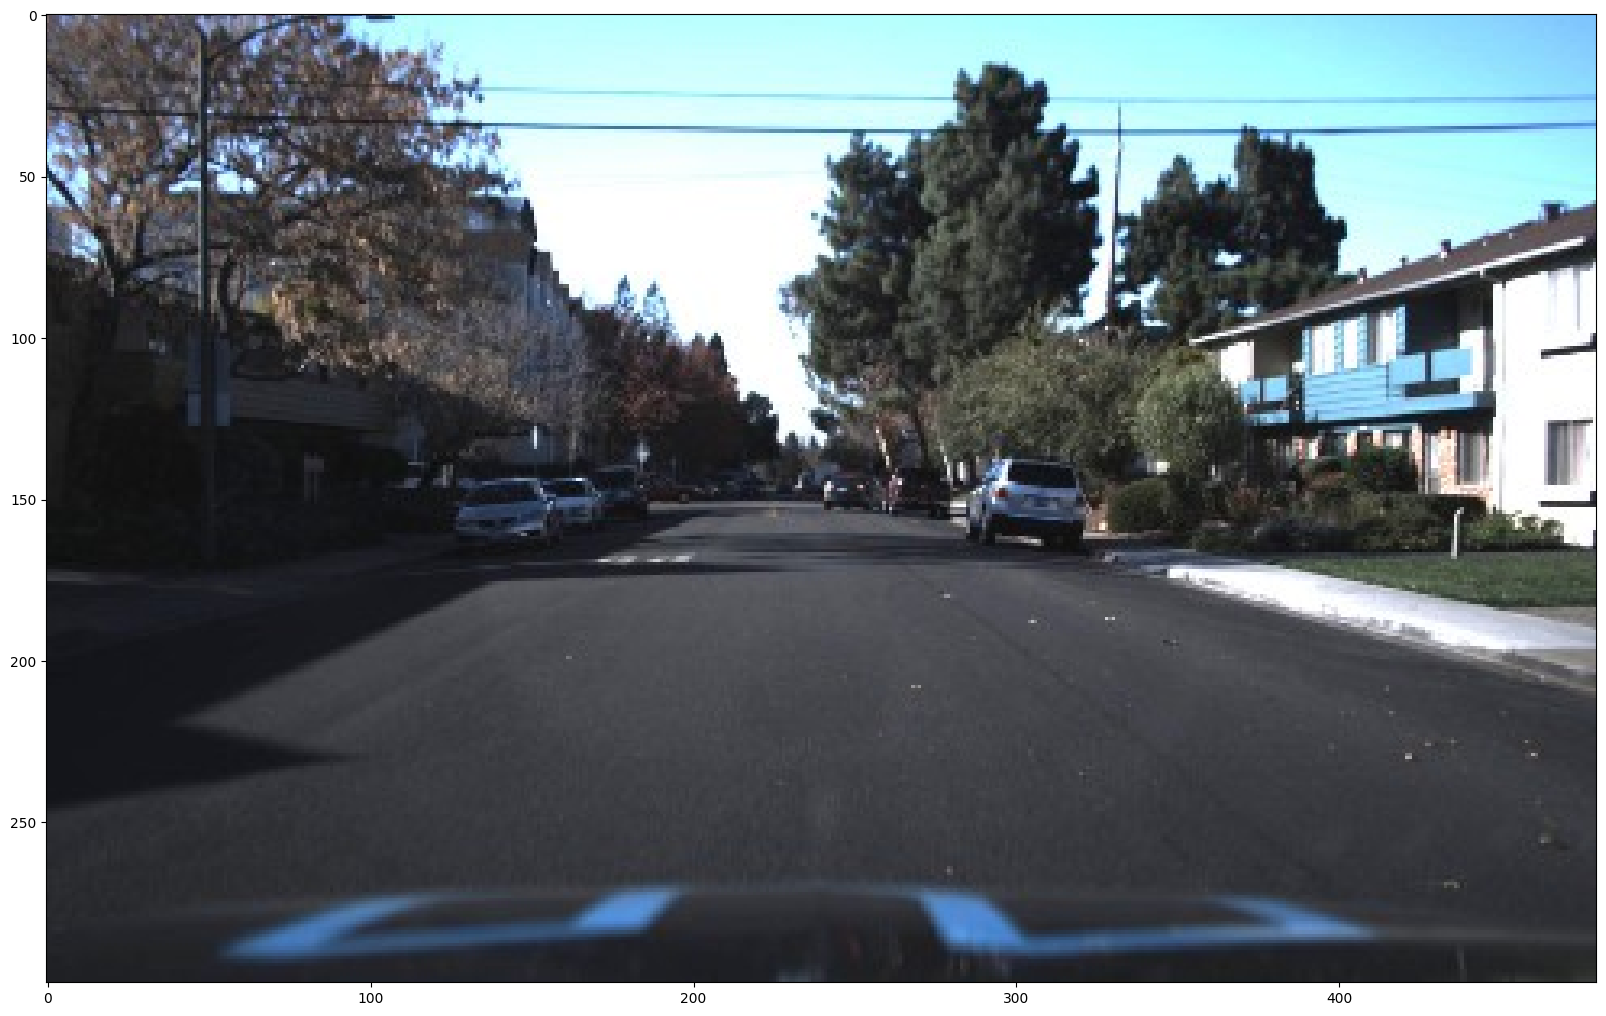

In [10]:
%matplotlib inline
plt.figure(figsize=(20, 20))
img = cv2.imread('images/1479506176491553178.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# 2. Using an object detection dataset: Visualization of the autonomous driving dataset

In [11]:
df = pd.read_csv('labels_train.csv')
df

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1
...,...,...,...,...,...,...
132401,1479506176491553178.jpg,166,186,139,156,1
132402,1479506176491553178.jpg,182,204,142,153,1
132403,1479506176491553178.jpg,239,261,139,155,1
132404,1479506176491553178.jpg,259,280,139,157,1


In [12]:
print(img.shape)

(300, 480, 3)


In [13]:
gt_boxes={}
for index, row in df.iterrows():
  if row['class_id'] == 3:
    bbox = np.array([[row['ymin']/300, row['xmin']/480, row['ymax']/300, row['xmax']/480]], dtype=np.float32)
    if row['frame'] in gt_boxes:
      gt_boxes[row['frame']] = np.append(gt_boxes[row['frame']], np.array(bbox), axis =0)
    else:
      gt_boxes[row['frame']] = np.array(bbox)

In [14]:
my_path = 'images/'
train_images_np = []

for image in gt_boxes.keys():
  im = cv2.imread(my_path + image)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  train_images_np.append(im)

In [15]:
pedestrain_class_id = 1
num_classes = 1

category_index = {
    num_classes: {
        'id' : pedestrain_class_id,
        'name': 'pedestrian'
    }
}

# 3. Using an object detection dataset: Final visualization

In [16]:
def plot_detections(image_np, boxes, classes, scores, category_index):
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.5
  )
  plt.imshow(image_np_with_annotations)

plt.figure(figsize=(30, 30))
for idx in range(0, 20):
  bboxes = list(gt_boxes.values())[idx]
  dummy_scores = np.ones(shape=[bboxes.shape[0]], dtype=np.float32)
  plt.subplot(5, 4, idx+1)
  plot_detections(
      train_images_np[idx],
      bboxes,
      np.ones(shape=[bboxes.shape[0]], dtype=np.int32),
      dummy_scores,
      category_index
  )

plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Data Augmentation with Albumentations

In [17]:
!pip install albumentations

In [18]:
import albumentations as A

In [19]:
transforms = A.Compose([
                        A.HorizontalFlip(p=0.8),
                        A.RandomBrightnessContrast(p=0.8)
], bbox_params=A.BboxParams(format='albumentations'))

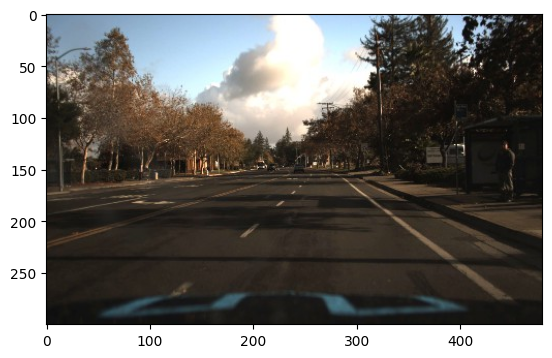

In [20]:
plt.figure()
plt.imshow(train_images_np[0])

In [21]:
bbox = list(gt_boxes.values())[0][0]
print(bbox)

[0.4        0.91041666 0.62       0.9458333 ]


In [22]:
bbox = [bbox[1], bbox[0], bbox[3], bbox[2]]

In [23]:
bbox.append('pedestrian')

In [24]:
bbox = [bbox]

In [25]:
trasformed_image_1 = transforms(image=train_images_np[0], bboxes=bbox)
trasformed_image_2 = transforms(image=train_images_np[0], bboxes=bbox)
trasformed_image_3 = transforms(image=train_images_np[0], bboxes=bbox)

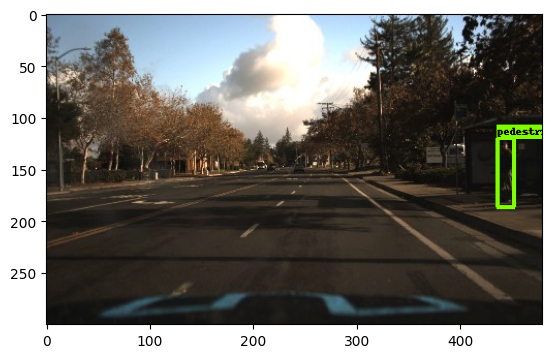

In [26]:
plt.figure()

plot_detections(
    train_images_np[0],
    np.array([list(gt_boxes.values())[0][0]]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_scores,
    category_index
)

In [27]:
transformed_bbox_1 = (list(trasformed_image_1['bboxes'][0])[:-1])

In [28]:
transformed_bbox_1 = [transformed_bbox_1[1], transformed_bbox_1[0], transformed_bbox_1[3], transformed_bbox_1[2]]

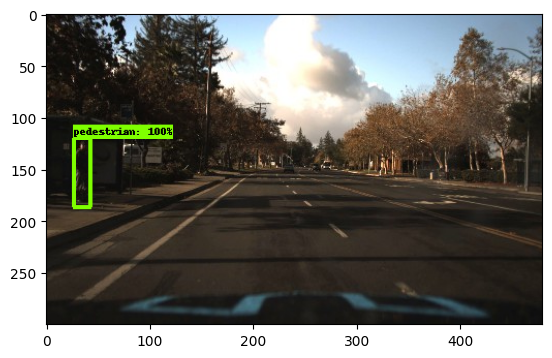

In [29]:
plt.figure()
plot_detections(
    trasformed_image_1['image'],
    np.array([transformed_bbox_1]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_scores,
    category_index
)

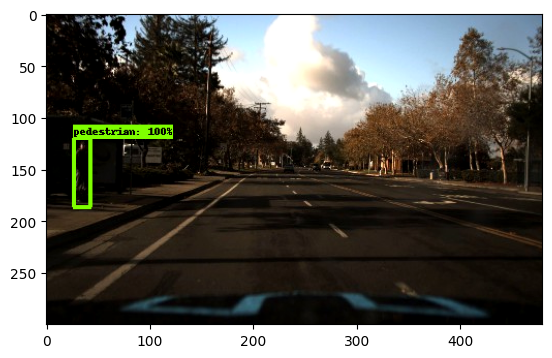

In [ ]:
transformed_bbox_2 = (list(trasformed_image_2['bboxes'][0])[:-1])
transformed_bbox_2 = [transformed_bbox_2[1], transformed_bbox_2[0], transformed_bbox_2[3], transformed_bbox_2[2]]
plt.figure()
plot_detections(
    trasformed_image_2['image'],
    np.array([transformed_bbox_2]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_scores,
    category_index
)

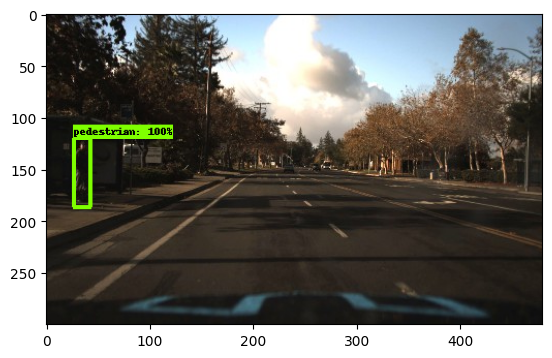

In [ ]:
transformed_bbox_3 = (list(trasformed_image_3['bboxes'][0])[:-1])
transformed_bbox_3 = [transformed_bbox_3[1], transformed_bbox_3[0], transformed_bbox_3[3], transformed_bbox_3[2]]
plt.figure()
plot_detections(
    trasformed_image_3['image'],
    np.array([transformed_bbox_3]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_scores,
    category_index
)

# 5. Using a Pre-trained Object Detection Model.

In [30]:
!wget  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

--2023-11-13 14:24:54--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.68.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M  21.7MB/s    in 12s     

2023-11-13 14:25:07 (19.6 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [31]:
from object_detection.utils import config_util
from object_detection.builders import model_builder

In [32]:
model_name = 'ssd_resnet50_v1_fpn_640x640_coco17_tpu-8'
pipeline_config = os.path.join('models/research/object_detection/configs/tf2/' + model_name + '.config')
model_dir = 'models/research/object_detection/test_data/checkpoint/'

In [33]:
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

In [34]:
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(model_dir, 'ckpt-0')).expect_partial()

In [35]:
def get_model_detection_function(model):

  @tf.function
  def detect_fn(image):
    image, shape = model.preprocess(image)
    prediction_dict = model.predict(image, shape)
    detections = model.postprocess(prediction_dict, shape)

    return detections

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

In [36]:
from object_detection.utils import label_map_util

label_map_path = configs['eval_input_config'].label_map_path
label_map_path = 'models/research/object_detection/data/mscoco_label_map.pbtxt'

label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True
)

category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [37]:
%matplotlib inline

img = cv2.imread('images/1479506176491553178.jpg')
image_np = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [38]:
input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32
)
detections = detect_fn(input_tensor)

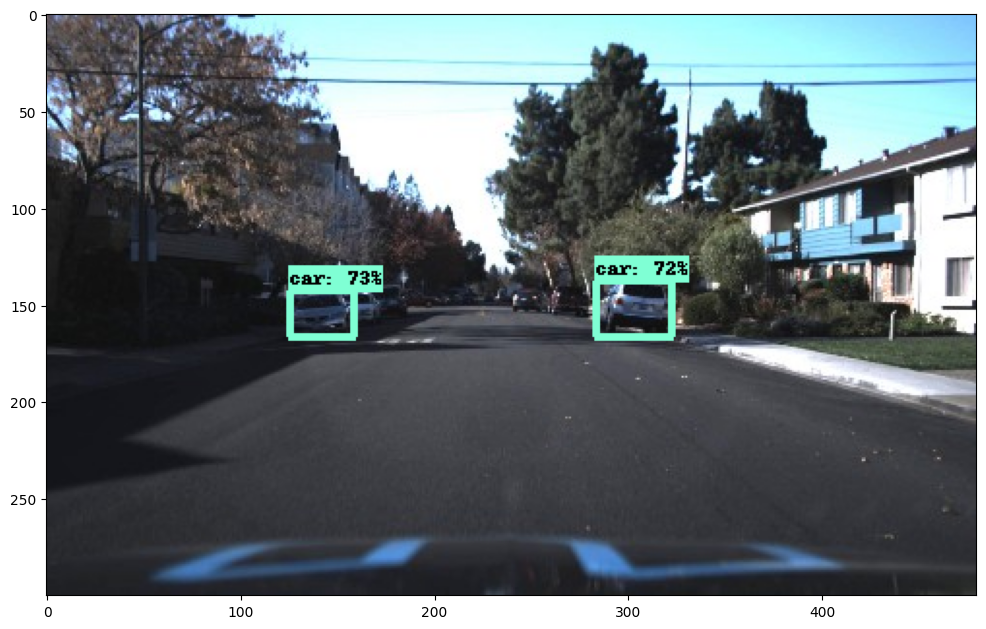

In [39]:
label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'][0].numpy(),
    (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
    detections['detection_scores'][0].numpy(),
    category_index,
    use_normalized_coordinates=True,
    min_score_thresh=0.7
)

plt.figure(figsize=(12, 16))
plt.imshow(image_np_with_detections)
plt.show()

# 6. Fine-tuning in object detection

In [40]:
from object_detection.utils import config_util
from object_detection.builders import model_builder


In [41]:
num_classes = 1
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'
checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'

In [42]:
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']


In [43]:
model_config.ssd.num_classes = num_classes
model_config.ssd.freeze_batchnorm = True
detection_model = model_builder.build(model_config=model_config, is_training=True)

In [44]:
fake_box_predictor = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_for_heads = detection_model._box_predictor._base_tower_layers_for_heads,
    _box_prediction_head=detection_model._box_predictor._box_prediction_head
)

In [45]:
fake_model = tf.compat.v2.train.Checkpoint(
    _feature_extractor=detection_model.feature_extractor,
    _box_predictor=fake_box_predictor
)

In [46]:
ckpt = tf.compat.v2.train.Checkpoint(model=fake_model)

In [47]:
ckpt.restore(checkpoint_path).expect_partial()

In [48]:
image, shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))

In [49]:
prediction_dict = detection_model.predict(image, shapes)

In [50]:
_ = detection_model.postprocess(prediction_dict, shapes)

In [51]:
df = pd.read_csv('labels_train.csv')
df

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1
...,...,...,...,...,...,...
132401,1479506176491553178.jpg,166,186,139,156,1
132402,1479506176491553178.jpg,182,204,142,153,1
132403,1479506176491553178.jpg,239,261,139,155,1
132404,1479506176491553178.jpg,259,280,139,157,1


In [52]:
gt_boxes = []
images_added = []
images_multi_bbox = set()

for index, row in df.iterrows():
  if row['frame'] not in images_added and row['class_id'] == 3:
    images_added.append(row['frame'])
    bbox = np.array([[row['ymin']/300, row['xmin']/480, row['ymax']/300, row['xmax']/480]], dtype=np.float32)
    gt_boxes.append(bbox)
  else:
    images_multi_bbox.add(row['frame'])



In [53]:
id_x_to_delete = []
for x, image in enumerate(images_added):
  if image in images_multi_bbox:
    id_x_to_delete.append(x)

In [54]:
new_gt_boxes = []
new_images_added = []
for x, gt_box in enumerate(gt_boxes):
  if x not in  id_x_to_delete:
    new_gt_boxes.append(gt_box)


In [55]:
for x, image_added in enumerate(images_added):
  if x not in id_x_to_delete:
    new_images_added.append(image_added)

In [56]:
gt_boxes = new_gt_boxes
images_added = new_images_added

In [57]:
my_path = 'images/'
train_images_np = []
print(len(images_added))
for image in images_added:
  im = cv2.imread(my_path+ image)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  train_images_np.append(im)

21


In [58]:
label_id_offset = 1
train_image_tensors = []
gt_classes_one_hot_tensors = []
gt_box_tensors = []
for (train_image_np, gt_box_np) in zip(train_images_np, gt_boxes):
  train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(train_image_np, dtype=tf.float32), axis=0))
  gt_box_tensors.append(tf.convert_to_tensor(gt_box_np, dtype=tf.float32))
  zero_indexed_ground_truth_classes = tf.convert_to_tensor(np.ones([gt_box_np.shape[0]], dtype=np.int32)-label_id_offset)
  gt_classes_one_hot_tensors.append(tf.one_hot(zero_indexed_ground_truth_classes, num_classes))

In [59]:
print(len(train_image_tensors))

21


In [60]:
tf.keras.backend.set_learning_phase(True)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [61]:
batch_size = 10
learning_rate= 0.01
num_batches = 200

In [62]:
trainable_variables = detection_model.trainable_variables
to_fine_tune = []
prefixes_to_train = [
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead',
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead'
]


for var in trainable_variables:
  if any([var.name.startswith(prefix) for prefix in prefixes_to_train]):
    to_fine_tune.append(var)

In [63]:
def get_model_train_step_function(model, optimizer, vars_to_fine_tune):

  @tf.function
  def train_step_fn(image_tensors,
                    groundtruth_boxes_list,
                    groundtruth_classes_list):
    shapes = tf.constant(batch_size * [[640, 640, 3]], dtype=tf.int32)
    model.provide_groundtruth(
        groundtruth_boxes_list=groundtruth_boxes_list,
        groundtruth_classes_list=groundtruth_classes_list
    )

    with tf.GradientTape() as tape:
      preprocessed_images = tf.concat(
          [detection_model.preprocess(image_tensor)[0]
          for image_tensor in image_tensors], axis=0
      )
      prediction_dict = model.predict(preprocessed_images, shapes)
      losses_dict = model.loss(prediction_dict, shapes)
      total_loss = losses_dict['Loss/localization_loss'] + losses_dict['Loss/classification_loss']
      gradients = tape.gradient(total_loss, vars_to_fine_tune)
      optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))

    return total_loss

  return train_step_fn

In [64]:
optimizer= tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
train_step_fn = get_model_train_step_function(detection_model, optimizer, to_fine_tune)

In [65]:
def process_data_augmentation(image_list, image_tensors, gt_boxes_list):
  new_train_image_tensors = []
  new_gt_box_tensors = []
  for x, image in enumerate(image_list):
    bbox = [gt_boxes_list[x].numpy()[0][1], gt_boxes_list[x].numpy()[0][0], gt_boxes_list[x].numpy()[0][3], gt_boxes_list[x].numpy()[0][2]]
    bbox.append('pedestrian')
    bbox = [bbox]

    transformed_image_1 = transforms(image=image, bboxes=bbox)
    transformed_bbox = (list(transformed_image_1['bboxes'][0])[:-1])
    transformed_bbox = [transformed_bbox[1], transformed_bbox[0], transformed_bbox[3], transformed_bbox[2]]
    gt_boxes_list[x] = transformed_bbox
    new_train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(transformed_image_1['image'], dtype =tf.float32), axis=0))
    transformed_bbox = np.array([transformed_bbox])
    new_gt_box_tensors.append(tf.convert_to_tensor(transformed_bbox, dtype=tf.float32))

  return new_train_image_tensors, new_gt_box_tensors


In [66]:
for idx in range(num_batches):
  all_keys = list(range(len(train_images_np)))
  random.shuffle(all_keys)
  example_keys = all_keys[:batch_size]


  gt_boxes_list = [gt_box_tensors[key] for key in example_keys]
  gt_classes_list = [gt_classes_one_hot_tensors[key] for key in example_keys]
  image_tensors = [train_image_tensors[key] for key in example_keys]
  image_list = [train_images_np[key] for key in example_keys]

  new_train_image_tensors, new_gt_box_tensors = process_data_augmentation(image_list, image_tensors, gt_boxes_list)

  images_tensors = new_train_image_tensors
  gt_boxes_list = new_gt_box_tensors

  total_loss = train_step_fn(images_tensors, gt_boxes_list, gt_classes_list)

  if idx % 10 == 0:
    print('batch ' + str(idx) + ' of ' + str(num_batches) + ', loss= ' + str(total_loss), flush=True)






batch 0 of 200, loss= tf.Tensor(1.5229352, shape=(), dtype=float32)
batch 10 of 200, loss= tf.Tensor(0.57191116, shape=(), dtype=float32)
batch 20 of 200, loss= tf.Tensor(3.0670266, shape=(), dtype=float32)
batch 30 of 200, loss= tf.Tensor(5.310704, shape=(), dtype=float32)
batch 40 of 200, loss= tf.Tensor(14.067711, shape=(), dtype=float32)
batch 50 of 200, loss= tf.Tensor(5.613628, shape=(), dtype=float32)
batch 60 of 200, loss= tf.Tensor(4.0841136, shape=(), dtype=float32)
batch 70 of 200, loss= tf.Tensor(3.2250786, shape=(), dtype=float32)
batch 80 of 200, loss= tf.Tensor(0.82044166, shape=(), dtype=float32)
batch 90 of 200, loss= tf.Tensor(0.56519914, shape=(), dtype=float32)
batch 100 of 200, loss= tf.Tensor(0.494722, shape=(), dtype=float32)
batch 110 of 200, loss= tf.Tensor(0.7653103, shape=(), dtype=float32)
batch 120 of 200, loss= tf.Tensor(0.32007304, shape=(), dtype=float32)
batch 130 of 200, loss= tf.Tensor(0.2804514, shape=(), dtype=float32)
batch 140 of 200, loss= tf.Ten

In [67]:
def detect(input_tensor):
  preprocessed_image, shapes = detection_model.preprocess(input_tensor)
  predict_dict = detection_model.predict(preprocessed_image, shapes)
  return detection_model.postprocess(predict_dict, shapes)

In [68]:
pedestrian_class_id = 1
num_classes = 1

category_index = {
    num_classes: {
        'id': pedestrian_class_id,
        'name': 'pedestrian'
    }
}

In [69]:
img = cv2.imread('images/1478900584619750605.jpg')
image_np = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [70]:
input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32
)

In [71]:
detections = detect(input_tensor)

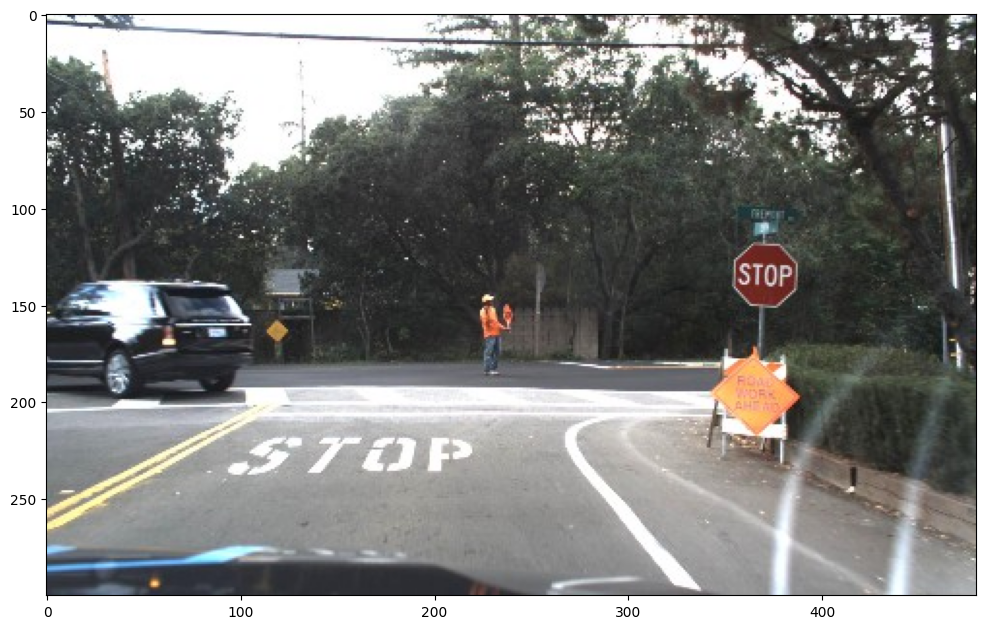

In [72]:
label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'][0].numpy(),
    (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
    detections['detection_scores'][0].numpy(),
    category_index,
    use_normalized_coordinates=True,
    min_score_thresh=0.7
)

plt.figure(figsize=(12, 16))
plt.imshow(image_np_with_detections)
plt.show()